In [67]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings("ignore") 

Reading Election Data and India map file(.shp file)

In [68]:
election_data= pd.read_csv("Datasets\General Election Data.csv")

india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

poverty_data_77= pd.read_csv("Datasets\Poverty data 1977-78.csv", skiprows=5, skipfooter=17,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])
poverty_data_73= pd.read_csv("Datasets\Poverty data 1972-73.csv", skiprows=5, skipfooter=12,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])

poverty_data_73.set_index("states", inplace=True)
poverty_data_77.set_index("states", inplace=True)

In [69]:
#Calculating state-wise average vote share of Congress candidates in 1971 election
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("State_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)
inc_1971.rename(index={"Mysore":"Karnataka"}, inplace=True)

#Calculating state-wise average vote share of Congress candidates in 1977 election
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("State_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)



<AxesSubplot:>

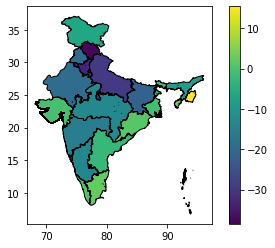

In [70]:
#Calculating diffrence in state-wise average vote share among the 1971 and 1977 election
vote_diff= inc_1977 - inc_1971
india_map=india_map.merge(vote_diff.to_frame(), left_on="States", right_on="State_Name")
india_map.plot(column='Vote_Share_Percentage',edgecolor="black", legend=True)

# calculating reduction poverty with 1973-74 data and 1977-78 data

<AxesSubplot:>

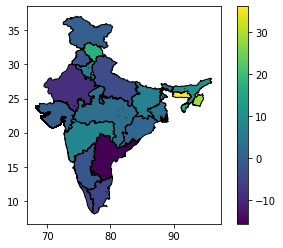

In [71]:
poverty_diff= poverty_data_77["combained_precentage"] - poverty_data_73["combained_precentage"] 

india_map= india_map.merge(poverty_diff, left_on="States", right_on="states")

india_map.plot(column="combained_precentage", legend=True, edgecolor="black")

In [72]:
#Correcting index names (removing underscores)
proper_index=[]
for state in vote_diff.index:
    proper_index.append(state.replace("_", " "))
    
rename_dir={}

for i,j in zip(proper_index, vote_diff.index):
    rename_dir[j]=i

vote_diff.rename(index=rename_dir, inplace=True)



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


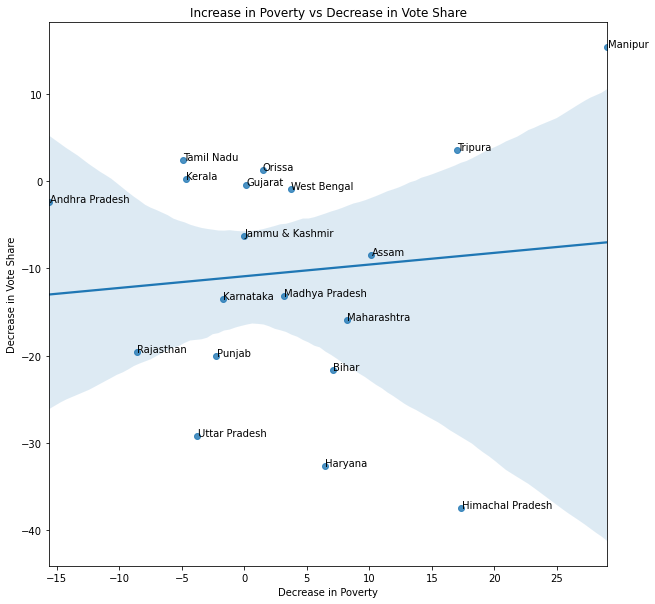

In [74]:
fig, ax=plt.subplots(figsize=(10,10))

sns.regplot(y=vote_diff.filter(items=poverty_diff.index), x=poverty_diff.filter(items=vote_diff.index), ax=ax )

plt.title("Increase in Poverty vs Decrease in Vote Share")
plt.xlabel("Decrease in Poverty")
plt.ylabel("Decrease in Vote Share")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point( poverty_diff.filter(items=vote_diff.index),vote_diff.filter(items=poverty_diff.index),
              pd.Series(vote_diff.index, index=list(vote_diff.index)), ax)

We can barely see any correlation is the the above plot. 